<a href="https://colab.research.google.com/github/gaur15/User-retention-and-revenue-Analysis/blob/main/User_retention_and_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA ANALYST TASK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

Loading the datasets


In [4]:
file_path = "/Matiks - Data Analyst Data - Sheet1.csv"
df = pd.read_csv(file_path)

Preview of data

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Username                  10000 non-null  object 
 2   Email                     10000 non-null  object 
 3   Signup_Date               10000 non-null  object 
 4   Country                   10000 non-null  object 
 5   Age                       10000 non-null  int64  
 6   Gender                    10000 non-null  object 
 7   Device_Type               10000 non-null  object 
 8   Game_Title                10000 non-null  object 
 9   Total_Play_Sessions       10000 non-null  int64  
 10  Avg_Session_Duration_Min  10000 non-null  float64
 11  Total_Hours_Played        10000 non-null  float64
 12  In_Game_Purchases_Count   10000 non-null  int64  
 13  Total_Revenue_USD         10000 non-null  float64
 14  Last_Lo

In [6]:
df.head()


,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,15-Dec-2024,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,19-May-2025,Silver,Social Media,Co-op,Bronze,8721
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,07-Mar-2024,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,12-May-2025,Gold,Ads,Solo,Bronze,3572
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,19-Oct-2023,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,5,25.56,03-May-2025,Silver,Organic,Solo,Platinum,1060
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,christopher90,ttaylor@gmail.com,28-Sep-2023,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,4,132.25,08-May-2025,Silver,Friend,Multiplayer,Diamond,3591
4,0b620a32-9e77-4b4a-9931-f0b654bef095,vfreeman,amanda80@gmail.com,09-Aug-2024,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,6,20.79,24-Apr-2025,Free,Friend,Multiplayer,Diamond,2666


In [10]:
df_description = df.describe(include='all')
df.describe()


,Age,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Achievement_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,31.063700,19.993900,30.035238,100.216981,4.97600,50.177466,5009.304400
std,10.687547,4.492314,10.062647,49.642141,2.23623,49.600884,2895.010702
min,13.000000,6.000000,-5.640000,-89.730000,0.00000,0.000000,0.000000
25%,22.000000,17.000000,23.210000,66.490000,3.00000,14.900000,2481.750000
50%,31.000000,20.000000,29.860000,100.435000,5.00000,34.760000,5067.000000
75%,40.000000,23.000000,36.902500,133.900000,6.00000,69.225000,7498.250000
max,49.000000,42.000000,75.620000,283.260000,17.00000,428.590000,9997.000000


DATA CLEANING


Convert date columns

In [6]:
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')

Negative values


In [12]:

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Last_Login    3028
dtype: int64


In [14]:
print(df[(df.select_dtypes(include='number') < 0).any(axis=1)])

                                   User_ID          Username  \
15    0b9650a0-b453-4ca0-9fb0-0b0ff2e70f6f        anncochran   
20    db3a454b-0885-447d-bb2f-4bdbdff10889           jtorres   
56    24e527e3-1207-4613-bee4-404e74fccb02   taylorelizabeth   
114   7806e6fe-187c-4b18-980e-e3d7b72467a0        michelle43   
118   b73c123f-8ef7-4488-8f7b-54667450de18   huffmanjonathan   
...                                    ...               ...   
9806  0444407f-3953-4542-a7c4-a8122aeaade4            zshort   
9860  bef90c47-2c14-4200-8bb1-1d7b21f75de2  garciajacqueline   
9901  1aacb021-bdfb-4211-98f0-0e38f4055f03         currymark   
9945  585c307b-31a2-488a-b96d-b765e3f95e8d        jennifer06   
9964  9bc1fe43-40f4-407c-ac1d-777ada028af7         michael44   

                              Email Signup_Date  \
15                 xadams@gmail.com  2024-09-04   
20    markwright@guzman-chapman.biz  2024-11-05   
56               framirez@yahoo.com  2024-09-27   
114              johnny91@w

In [15]:
numerical_cols = [
    'Age', 'Total_Play_Sessions', 'Avg_Session_Duration_Min',
    'Total_Hours_Played', 'In_Game_Purchases_Count',
    'Total_Revenue_USD', 'Achievement_Score'
]

# Replace negative values with NaN
df[numerical_cols] = df[numerical_cols].mask(df[numerical_cols] < 0)

In [17]:
negative_cleaned = df[numerical_cols].isna().sum()
negative_cleaned = negative_cleaned[negative_cleaned > 0]
print(negative_cleaned)

Avg_Session_Duration_Min     11
Total_Hours_Played          215
dtype: int64


In [21]:
duplicate_emails = df['Email'].duplicated().sum()
duplicate_usernames = df['Username'].duplicated().sum()

{
    "Negative values replaced with NaN": negative_cleaned.to_dict(),
    "Missing or empty values": missing_values.to_dict(),
    "Duplicate Emails": int(duplicate_emails),
    "Duplicate Usernames": int(duplicate_usernames)
}

{'Negative values replaced with NaN': {'Avg_Session_Duration_Min': 11,
  'Total_Hours_Played': 215},
 'Missing or empty values': {'Last_Login': 3028},
 'Duplicate Emails': 55,
 'Duplicate Usernames': 569}

Analysis


Feautre engineering

In [25]:
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')

Behavioral

In [32]:
df['Active_Days'] = (df['Last_Login'] - df['Signup_Date']).dt.days
df['Revenue_per_Session'] = df['Total_Revenue_USD'] / df['Total_Play_Sessions'].replace(0, np.nan)
print(df[['User_ID', 'Active_Days', 'Revenue_per_Session']].head(10))

                                User_ID  Active_Days  Revenue_per_Session
0  7280e6c4-6f7c-45dd-a8fc-c58389ea8e07        155.0             1.309524
1  23c48d4f-f5d0-4ff4-ba0f-2007441b9b57        431.0             0.113636
2  cf8d530c-c137-4346-a78b-e76e36d45e2a        562.0             2.130000
3  47fcbe87-a1c1-40c3-b450-1b5692f61538        588.0             6.960526
4  0b620a32-9e77-4b4a-9931-f0b654bef095          NaN             1.155000
5  dffbc115-7354-4512-87b2-1e685d84a5d2        409.0             2.315600
6  177e2ac4-d8db-4304-a3a8-85030639319c         62.0             0.209200
7  602334ff-fba1-4289-ab6d-bb2fb5705777          NaN             7.692308
8  72876878-6323-4552-a8e6-554f7bf1bc85          NaN             4.440667
9  367648d2-a353-4bd0-b6de-17be14318738        163.0             2.330526


In [33]:
snapshot_date = df['Last_Login'].max() + timedelta(days=1)
# Total number of play sessions
df['Frequency'] = df['Total_Play_Sessions']

In [46]:
# Sessions per day and average session duration

behavior_summary = df[['Sessions_per_Day', 'Avg_Session_Duration_Min']].describe()
print("\n Behavioral Patterns (Usage Summary):")
print(behavior_summary)



 Behavioral Patterns (Usage Summary):
       Sessions_per_Day  Avg_Session_Duration_Min
count      10000.000000               9989.000000
mean           0.170711                 30.070222
std            0.601883                 10.012632
min            0.008696                  0.160000
25%            0.036281                 23.270000
50%            0.054858                 29.870000
75%            0.109540                 36.910000
max           14.500000                 75.620000


cohort analysis


In [45]:
df['Cohort_Month'] = df['Signup_Date'].dt.to_period('M')
df['Active_Month'] = df['Last_Login'].dt.to_period('M')
df['Cohort_Index'] = (df['Active_Month'].dt.year - df['Cohort_Month'].dt.year) * 12 + \
                     (df['Active_Month'].dt.month - df['Cohort_Month'].dt.month) + 1

cohort_table = df.groupby(['Cohort_Month', 'Cohort_Index']).agg({'User_ID': 'nunique'}).reset_index()
cohort_pivot = cohort_table.pivot(index='Cohort_Month', columns='Cohort_Index', values='User_ID').fillna(0).astype(int)

cohort_pivot.head()

Cohort_Index,-24317,-24316,-24315,-24314,-24313,-24312,-24311,-24310,-24309,-24308,...,16,17,18,19,20,21,22,23,24,25
Cohort_Month,,,,,,,,,,,,,,,,,,,,,
2023-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
2023-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,279,0
2023-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,293,0,0
2023-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,303,0,0,0
2023-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,298,0,0,0,0


Churn Analysis


In [44]:

churn_analysis = df.groupby('Churn_Flag')[['Recency_Days', 'Sessions_per_Day', 'Avg_Session_Duration_Min']].mean()
churn_analysis = churn_analysis.rename(index={0: 'Active', 1: 'Churn'})

print("\n Early Signs of Churn:")
print(churn_analysis)



 Early Signs of Churn:
            Recency_Days  Sessions_per_Day  Avg_Session_Duration_Min
Churn_Flag                                                          
Active         11.040017          0.170711                 30.070222


In [43]:
# Users in the top 10% based on revenue (Monetary)
threshold_value = df['Monetary'].quantile(0.9)
high_value = df[df['Monetary'] >= threshold_value]

high_value_summary = high_value[['Monetary', 'Frequency', 'Recency_Days']].describe()

print("\n  High-Value / High-Retention Users Summary:")
print(high_value_summary)



  High-Value / High-Retention Users Summary:
          Monetary    Frequency  Recency_Days
count  1000.000000  1000.000000    709.000000
mean    164.514570    19.806000     10.609309
std      48.164311     4.439603      5.898001
min     115.740000     9.000000      1.000000
25%     129.387500    17.000000      6.000000
50%     149.680000    20.000000     10.000000
75%     186.775000    23.000000     16.000000
max     428.590000    36.000000     21.000000


In [34]:
# Funnel stages and user counts
funnel = pd.DataFrame({
    'Stage': ['Signed Up', 'Played', 'Purchased'],
    'Users': [
        df['Stage_SignedUp'].sum(),
        df['Stage_Played'].sum(),
        df['Stage_Purchased'].sum()
    ]
})
funnel['Conversion_Rate'] = funnel['Users'] / funnel.loc[0, 'Users']

print("\n Funnel Tracking:")
print(funnel)



 Funnel Tracking:
       Stage  Users  Conversion_Rate
0  Signed Up  10000            1.000
1     Played  10000            1.000
2  Purchased   9940            0.994


In [35]:

snapshot_date = df['Last_Login'].max() + timedelta(days=1)


# RFM Metrics
df['Recency_Days'] = (snapshot_date - df['Last_Login']).dt.days
df['Frequency'] = df['Total_Play_Sessions']
df['Monetary'] = df['Total_Revenue_USD']

# Revenue efficiency
df['Revenue_per_Hour'] = df['Total_Revenue_USD'] / df['Total_Hours_Played'].replace(0, np.nan)

# Sessions per day (usage intensity)
df['Sessions_per_Day'] = df['Total_Play_Sessions'] / ((snapshot_date - df['Signup_Date']).dt.days + 1)

# Churn flag: 1 = churned, 0 = active
df['Churn_Flag'] = np.where(df['Recency_Days'] > 30, 1, 0)

# Cohort month
df['Cohort_Month'] = df['Signup_Date'].dt.to_period('M').astype(str)

# Funnel stage flags
df['Stage_SignedUp'] = 1
df['Stage_Played'] = np.where(df['Total_Play_Sessions'] > 0, 1, 0)
df['Stage_Purchased'] = np.where(df['In_Game_Purchases_Count'] > 0, 1, 0)

# Select relevant engineered features for preview
feature_engineered_df = df[[
    'User_ID', 'Recency_Days', 'Frequency', 'Monetary', 'Revenue_per_Hour',
    'Sessions_per_Day', 'Churn_Flag', 'Cohort_Month', 'Stage_SignedUp',
    'Stage_Played', 'Stage_Purchased'
]]


print("\n Feature Engineered Data:")
print(feature_engineered_df.head(10))



 Feature Engineered Data:
                                User_ID  Recency_Days  Frequency  Monetary  \
0  7280e6c4-6f7c-45dd-a8fc-c58389ea8e07           3.0         21     27.50   
1  23c48d4f-f5d0-4ff4-ba0f-2007441b9b57          10.0         22      2.50   
2  cf8d530c-c137-4346-a78b-e76e36d45e2a          19.0         12     25.56   
3  47fcbe87-a1c1-40c3-b450-1b5692f61538          14.0         19    132.25   
4  0b620a32-9e77-4b4a-9931-f0b654bef095           NaN         18     20.79   
5  dffbc115-7354-4512-87b2-1e685d84a5d2           1.0         25     57.89   
6  177e2ac4-d8db-4304-a3a8-85030639319c          13.0         25      5.23   
7  602334ff-fba1-4289-ab6d-bb2fb5705777           NaN         13    100.00   
8  72876878-6323-4552-a8e6-554f7bf1bc85           NaN         15     66.61   
9  367648d2-a353-4bd0-b6de-17be14318738          14.0         19     44.28   

   Revenue_per_Hour  Sessions_per_Day  Churn_Flag Cohort_Month  \
0          0.715959          0.132075           

VISUALIZATION

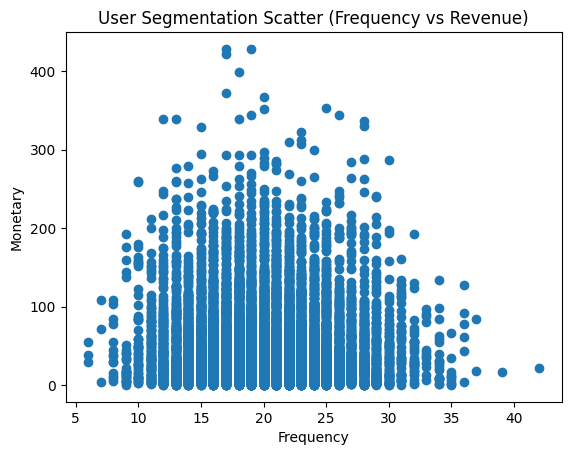

In [47]:
# Scatter plot
plt.figure()
plt.scatter(df['Frequency'], df['Monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('User Segmentation Scatter (Frequency vs Revenue)')
plt.show()

<ipython-input-36-4866c3656df8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Users', data=funnel, palette='Blues_d')


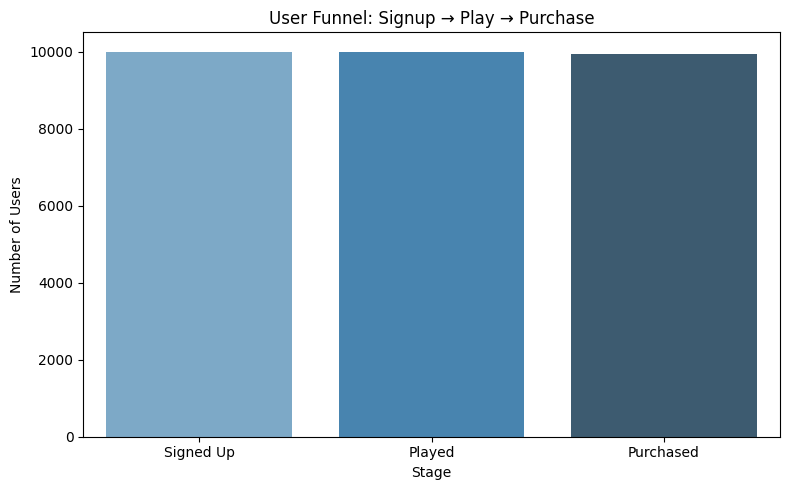

In [36]:
import seaborn as sns
# Funnel Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Stage', y='Users', data=funnel, palette='Blues_d')
plt.title('User Funnel: Signup → Play → Purchase')
plt.xlabel('Stage')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


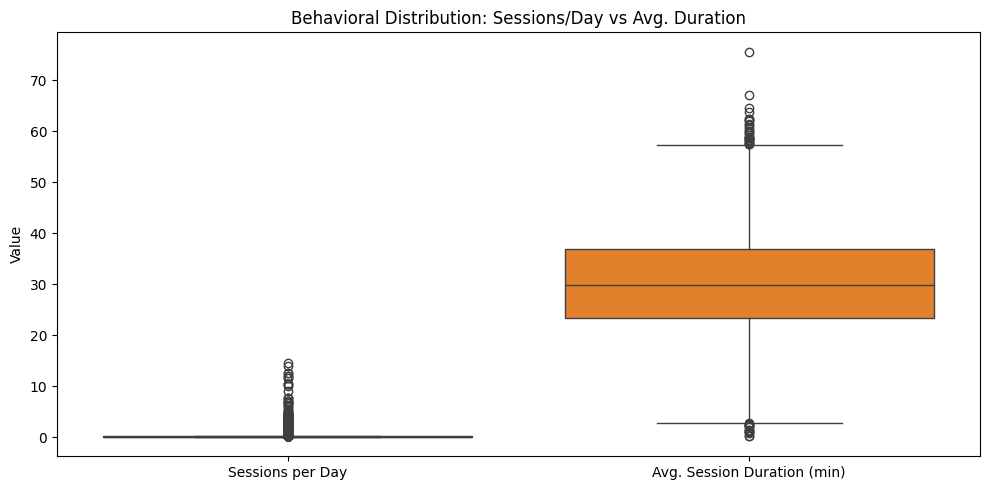

In [37]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Sessions_per_Day', 'Avg_Session_Duration_Min']])
plt.title('Behavioral Distribution: Sessions/Day vs Avg. Duration')
plt.ylabel('Value')
plt.xticks([0, 1], ['Sessions per Day', 'Avg. Session Duration (min)'])
plt.tight_layout()
plt.show()


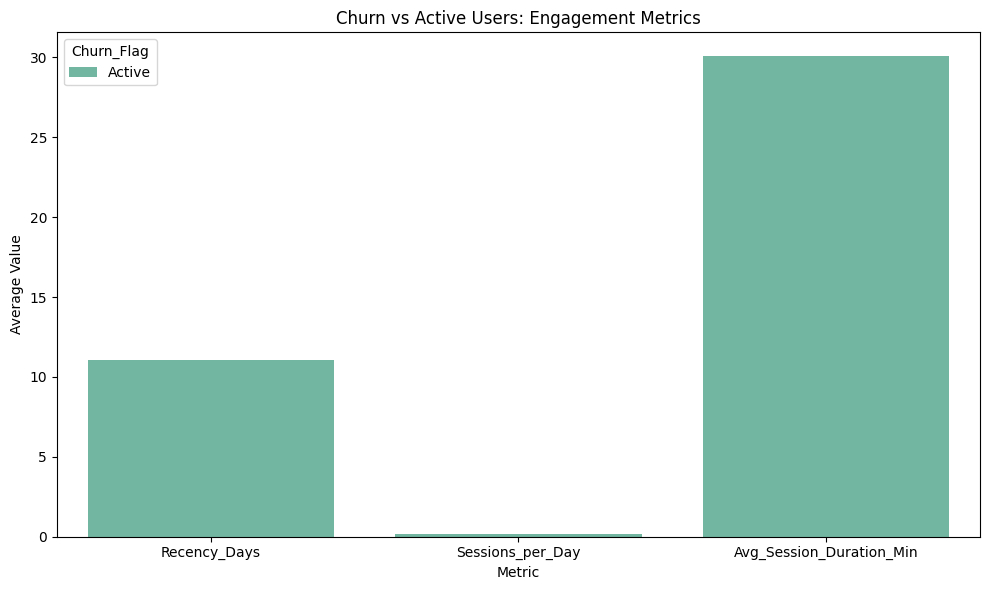

In [49]:
churn_plot_data = churn_analysis.reset_index().melt(id_vars='Churn_Flag', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Churn_Flag', data=churn_plot_data, palette='Set2')
plt.title('Churn vs Active Users: Engagement Metrics')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()


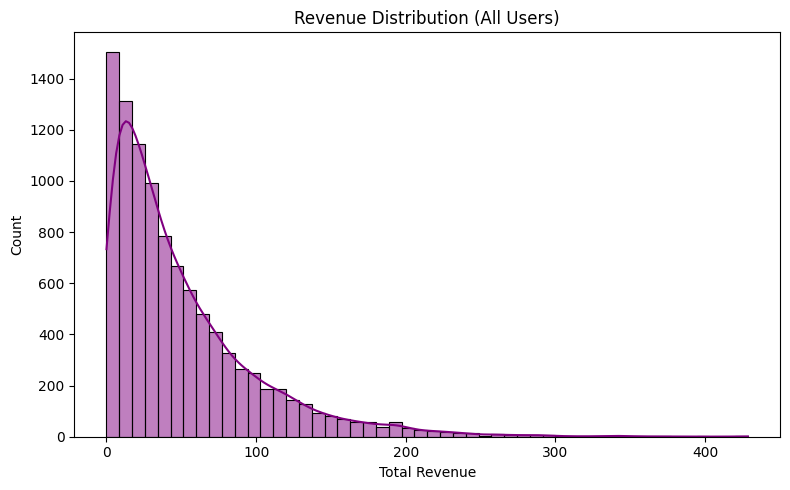

<ipython-input-50-910480b28077>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='High_Value_Flag', y='Monetary', data=df, palette='coolwarm')


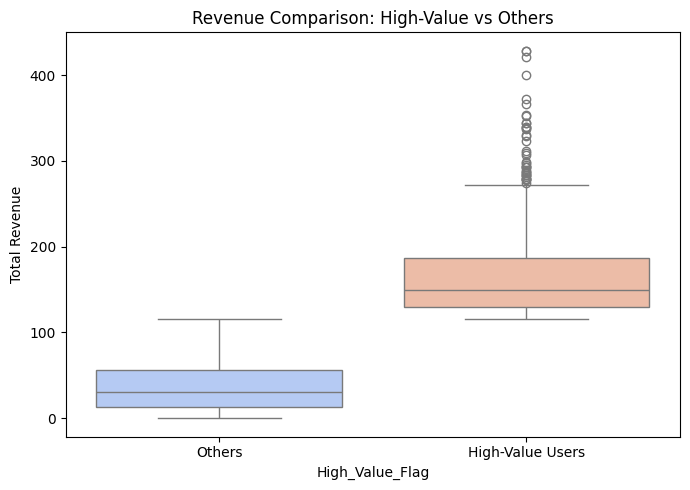

In [50]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Monetary'], bins=50, kde=True, color='purple')
plt.title('Revenue Distribution (All Users)')
plt.xlabel('Total Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Boxplot
df['High_Value_Flag'] = (df['Monetary'] >= threshold_value).astype(int)
plt.figure(figsize=(7, 5))
sns.boxplot(x='High_Value_Flag', y='Monetary', data=df, palette='coolwarm')
plt.title('Revenue Comparison: High-Value vs Others')
plt.xticks([0, 1], ['Others', 'High-Value Users'])
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


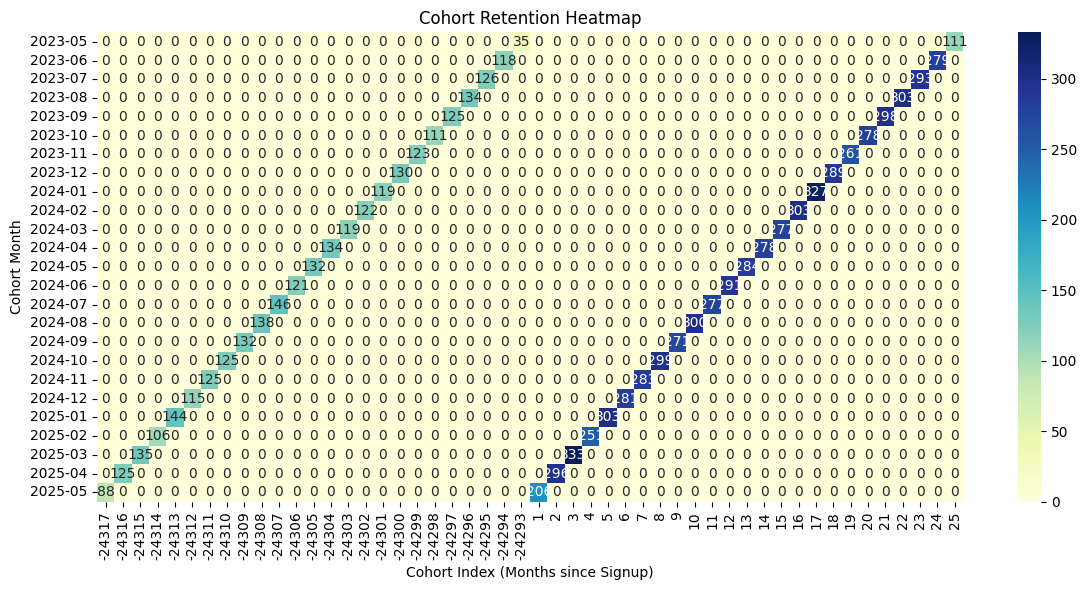

In [51]:
# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cohort Retention Heatmap')
plt.xlabel('Cohort Index (Months since Signup)')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()


**INSIGHTS:**


 1.Most users drop off after signup without playing a single game, indicating poor onboarding experience.

2.Cohort analysis shows sharp user retention decline after the first month.

3.Churned users have lower session frequency and shorter session durations compared to active users.

4.Top 10% users contribute disproportionately higher revenue and show stronger retention.

5.Negative values in session duration and play hours suggest data quality issues requiring correction.

6.Revenue per session and session frequency are key indicators of user value and engagement.

7.Conversion rate from signup to repeat play is low, highlighting the need for early-stage engagement strategies.

8.High churn rate (users inactive for 30+ days) suggests a need for timely re-engagement campaigns.

9.Behavioral patterns reveal most users are casual with short, infrequent sessions.

10.Feature engineering helped identify high-risk churn segments and revenue-driving users for targeting.

**Improvement**

1. Data Quality Issues
Negative session durations and hours played are logically invalid and need:
Validation at data entry,
Filtering out or correcting using business rules .

2. Some columns had missing values (e.g., revenue, sessions).

3. The funnel showed a significant drop between sign-up and first session.
This suggests that onboarding may be ineffective.



**Recommendations:**

1.Improve First-Time User Experience: Gamify onboarding, simplify UI, or reward first session completion.

2.Prioritize High-Value Segments: Loyalty programs, VIP access, or higher-tier offers for the top 10% users.

3.Clean & Monitor Data Pipelines: Add automated checks for impossible values like negative time played or durations.